# Importing the Libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

# Importing the Dataset

In [57]:
dset = pd.read_csv("Churn_Modelling.csv")

X = dset.iloc[:,3:-1]
y = dset.iloc[:,-1]

In [58]:
# show X
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [59]:
# show y
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# Data Preprocessing 

#### Geography and Gender have columns need to be encoded:

In [60]:
# create dummies variables:
geography = pd.get_dummies(X['Geography'], drop_first=True) 
gender = pd.get_dummies(X['Gender'], drop_first=True)

# print(geography) # is a DataFrame
# print(gender) # is a DataFrame

In [61]:
#  Concat the geography and gender Dataframes to X Dataframe:
X = pd.concat([X,gender,geography], axis=1)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,0


In [62]:
# drop unnecessary columns:
X = X.drop(['Geography','Gender'], axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0


# Splitting the dset into training and testing dset:

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [64]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
7389,667,34,5,0.00,2,1,0,163830.64,0,0,1
9275,427,42,1,75681.52,1,1,1,57098.00,1,1,0
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,1,0,1
356,850,57,8,126776.30,2,1,1,132298.49,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,0,1,0
4859,794,22,4,114440.24,1,1,1,107753.07,0,0,1
3264,738,35,5,161274.05,2,1,0,181429.87,1,0,0
9845,590,38,9,0.00,2,1,1,148750.16,0,0,1


In [65]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
9394,597,35,8,131101.04,1,1,1,192852.67,0,1,0
898,523,40,2,102967.41,1,1,0,128702.10,0,0,0
2398,706,42,8,95386.82,1,1,1,75732.25,0,0,1
5906,788,32,4,112079.58,1,0,0,89368.59,1,0,0
2343,706,38,5,163034.82,2,1,1,135662.17,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1037,625,24,1,0.00,2,1,1,180969.55,0,0,0
2899,586,35,7,0.00,2,1,0,70760.69,0,0,0
9549,578,36,1,157267.95,2,1,0,141533.19,1,0,1
2740,650,34,4,142393.11,1,1,1,11276.48,1,1,0


In [66]:
y_train

7389    0
9275    0
2995    0
5316    0
356     0
       ..
9225    0
4859    0
3264    0
9845    0
2732    1
Name: Exited, Length: 8000, dtype: int64

In [67]:
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: Exited, Length: 2000, dtype: int64

# Feature Scaling:

In [68]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [69]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -1.09168714,
        -0.5698444 ,  1.74309049],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.91601335,
         1.75486502, -0.57369368],
       [-1.19119591, -0.94312892, -1.031415  , ..., -1.09168714,
        -0.5698444 , -0.57369368],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.91601335,
        -0.5698444 , -0.57369368],
       [-0.62420521, -0.08179119,  1.39076231, ..., -1.09168714,
        -0.5698444 ,  1.74309049],
       [-0.28401079,  0.87525072, -1.37744033, ..., -1.09168714,
         1.75486502, -0.57369368]])

In [70]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ..., -1.09168714,
         1.75486502, -0.57369368],
       [-1.31490297,  0.10961719, -1.031415  , ..., -1.09168714,
        -0.5698444 , -0.57369368],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -1.09168714,
        -0.5698444 ,  1.74309049],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  0.91601335,
        -0.5698444 ,  1.74309049],
       [-0.00566991, -0.46460796, -0.33936434, ...,  0.91601335,
         1.75486502, -0.57369368],
       [-0.79945688, -0.84742473,  1.04473698, ...,  0.91601335,
         1.75486502, -0.57369368]])

# Creating ANN (Artificial Neural Network):

#### Importing libraries:

In [71]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, ReLU, PReLU
from keras.layers import Dropout

#### Adding Layers to ANN:

In [72]:
# create instance of Sequencial model for ANN:
classifier = Sequential()

# add i/p layer and 1st hidden layer:
classifier.add(Dense(
    units=10, # output neurons
    kernel_initializer= 'he_uniform', # weight initialization method
    input_dim=11, # input neurons
    activation='relu', # activation fxn

))

# add a Dropout Layer:
classifier.add(Dropout(0.3))

# add 2nd hidden layer:
classifier.add(Dense(
    units=8,
    kernel_initializer='he_uniform',
    activation='relu'
))

# add a Dropout Layer:
classifier.add(Dropout(0.4))

# add 3nd hidden layer:
classifier.add(Dense(
    units=6,
    kernel_initializer='he_uniform',
    activation='relu'
))

# add a Dropout Layer:
classifier.add(Dropout(0.2))

# add output layer:
classifier.add(Dense(
    units=1, # 1 neuron as we wanr binary(0 or 1) as output
    kernel_initializer='glorot_uniform', 
    activation='sigmoid'
))

In [73]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                120       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 54        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

#### Compile the ANN:

In [74]:
classifier.compile(
    optimizer='adam',
    loss='binary_crossentropy', # use binary_crossentropy for binary-o/p and categorical_crossentropy for categorical o/p
    metrics=['accuracy']
    )

#### Training the ANN:

In [75]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.6838 - accuracy: 0.6435 - val_loss: 0.5142 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5414 - accuracy: 0.7845 - val_loss: 0.4834 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5022 - accuracy: 0.7998 - val_loss: 0.4698 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4897 - accuracy: 0.7972 - val_loss: 0.4603 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4681 - accuracy: 0.8063 - val_loss: 0.4500 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4872 - accuracy: 0.7963 - val_loss: 0.4481 - val_accuracy: 0.7959
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4586 - accuracy: 0.8055 - val_loss: 0.4408 - val_accuracy: 0.7959

#### Making predictions and Evaluating the Model:

###### Predicting on the test_dset :

In [76]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

###### Create the Confusion Matrix:

In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
cm

array([[1569,  303],
       [  26,  102]])

###### Calculate the Accuracy:

In [78]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_pred, y_test)
ac

0.8355

# Visualize ANN's Accuracy and Loss

In [79]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


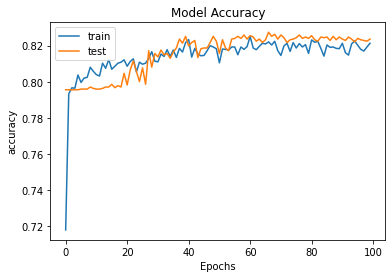

In [80]:
# plot accuracy;

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

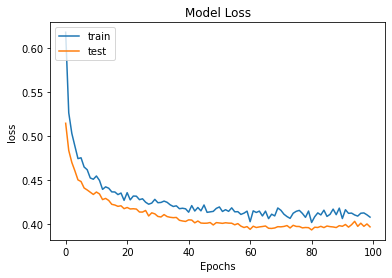

In [81]:
# plot loss;

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train','test'], loc='upper left')
plt.show()